## Chapter 2 퍼셉트론 (perceptron)

퍼셉트론 알고리즘
- 프랑크 로젠블라트(Frank Rosenbaltt)가 1957년 고안한 알고리즘
- 딥러닝의 기원이 되는 알고리즘으로 신경망 딥러닝으로 나가는 중요한 아이디어를 배우는 일

신경망의 역사 
- 1943년 신경생리학자 워런 매컬러(Warren McCulloch)와 수학자 월터 피츠(Walter pitts)가 쓴 논문에서 소개되었다. 명제 논리를 사용해 동물 뇌의 생물학적 뉴런이 복잡한 계산을 위해 어떻게 상호작용하는지에 대한 간단한 계산 모델 제시  
[A Logical calculus of ideas Immanent In Nervous Activity](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)
- 1969년 [perceptron]논문에서 마빈 민스키(Marvin Minsky)와 시모어 페퍼트(Seymour Parpert)는 퍼셉트론의 여러가지 심각한 약점을 언급했다. (XOR 분류문제) 
- 1986년 데이비드 루멜하트(David Rumelhart), 제프리 힌턴, 로날드 윌리엄스(Ronald Williams)가 역전파(backpropagation) 훈련 알고리즘을 소개하는 획기적인 논문 공개(이 알고리즘은 오늘날도 사용함- gredient descent)
- 1990년 인공지능 빙하기...


### 2.1 퍼셉트론이란?

- 다수의 신호를 입력값으로 받아서 하나의 신호를 출력한다. 
- TLU(Threshold Logic Unit) 또는 LTU(Linear Threshold Unit)이라고 불리는 조금 다른 형태의 인공뉴런을 기반으로 한다.  
- 입력이 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있다.
- TLU는 입력의 가중치 합을 계산($z= w_1z_1 + w_2z_2+...+w_nz_n=X^TW$)한 뒤에 계단 함수(step function)를 적용하여 결과를 출력합니다. 

$$h_w(x)=step(z), z=x^Tw$$

$$y=\begin{cases}
0 \;(w_1z_1 + w_2z_2)\leq\theta\\
1 \;(w_1z_1 + w_2z_2)\gt\theta
\end{cases}$$

- $x_1$과 $x_2$: 입력값 (input)
- $w_1$과 $w_2$: 가중치 (weight)
- $\theta$: 임계값(threshold)




### 2.2 단순한 논리회로

#### 2.2.1 AND게이트
- 진리표

|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

- 이 AND 게이트 진리표대로 작동하는 $w_1, w_2, \theta$ 값을 정하는 것이 목표
- 이 매개변수 조합($w_1, w_2, \theta$)은 무한히 많다. (0.5,0.5,0.7), (0.5,0.5,0.8) 등등...

#### 2.2.2 NAND게이트와 OR게이트

|$x_1$|$x_2$|$y_{NAND}$|$y_{OR}$|
|-|-|-|-|
|0|0|1|0|
|1|0|1|1|
|0|1|1|1|
|1|1|0|1|

- NAND게이트의 weight 조합은 ($w_1, w_2, \theta$)=(-0.5, -0.5, 0.7) 조합이 있다. 사실 AND게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND게이트이다.

- 여기서 중요한 점은 __퍼셉트론의 구조는 AND, NAND, OR 게이트 모두 똑같다는 점__ 이다. 세가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값 뿐이다. 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정해서 AND, NAND, OR로 변신한다.



### 2.3 퍼셉트론 구현하기

#### 2.3.1 간단한 구현부터: AND 게이트


In [29]:
def AND(x1, x2):
    w1, w2, theta=0.5, 0.5, 0.7
    tmp=x1 * w1 + x2 *w2
    if tmp<=theta:
        print("w1*x1 + w2*x2=%f"%tmp)
        return 0
    elif tmp>theta:
        print("w1*x1 + w2*x2=%f"%tmp)
        return 1
    

In [30]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))


w1*x1 + w2*x2=0.000000
0
w1*x1 + w2*x2=0.500000
0
w1*x1 + w2*x2=0.500000
0
w1*x1 + w2*x2=1.000000
1


#### 2.3.2  가중치와 편향(bias) 도입

- $\theta$ 를 $-b$로 치환하면 페셉트론의 동작이 다음과 같이 된다.
$$y=\begin{cases}
0 \;(b+w_1z_1 + w_2z_2\leq0)\\
1 \;(b+w_1z_1 + w_2z_2\gt0)
\end{cases}$$

- 이 $b$를 편향(bias)라고 하며, $w_1$과 $w_2$는 그대로 가중치(weight)이다.

In [31]:
import numpy as np

x=np.array([0,1])      # 입력
w=np.array([0.5, 0.5]) # 가중치
b=-0.7                 # 편향

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


### 2.3.3 가중치와 편향 구하기

- $-\theta$가 편향 $b$로 치환되었다. 편향은 가중치 $w_1, w_2$와 

In [32]:
def AND(x1, x2):
    x=np.array([x1,x2])      # 입력
    w=np.array([0.5, 0.5]) # 가중치
    b=-0.7                 # 편향
    tmp=np.sum(w*x)+b

    if tmp<=0:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 0
    else:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 1
    

In [33]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [34]:
def NAND(x1, x2):
    x=np.array([x1,x2])      # 입력
    w=np.array([-0.5, -0.5]) # 가중치
    b=0.7                 # 편향
    tmp=np.sum(w*x)+b

    if tmp<=0:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 0
    else:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 1

def OR(x1, x2):
    x=np.array([x1,x2])      # 입력
    w=np.array([0.5, 0.5]) # 가중치
    b=-0.2                 # 편향
    tmp=np.sum(w*x)+b

    if tmp<=0:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 0
    else:
        #print("%f *%f + %f*%f=%f"%(w[0],x[0],w[1],x[1],tmp))
        return 1
    

In [35]:
print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))
print("-"*50)
print(OR(0, 0))
print(OR(1, 0))
print(OR(0, 1))
print(OR(1, 1))

1
1
1
0
--------------------------------------------------
0
1
1
1


### 2.4 퍼셉트론의 한계

#### 2.4.1 XOR게이트

- XOR 게이트는 배타적 논리합이라는 논리회로입니다. $x_1$과 $x_2$ 중 한쪽이 1일 때만 1을 출력합니다. ('배타적'이란 자기 외에는 거부한다는 의미죠). 자, 이 XOR 게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정하면 될까? 


|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|


- 사실 지금까지 본 퍼셉트론으로는 이 XOR게이트를 구현할 수 없습니다. 왜 AND와 OR는 되고 안되는 이유는 선형성과 비선형성에 있다.
- 그림 2-7(XOR게이트의 출력-p.57)의 삼각형(0)과 원(1)을 직선으로는 나눌 수는 없다.

#### 2.4.2 선형과 비선형  

- 직선이라는 제약을 없애서 퍼셉트론을 곡선(비선형)으로 나누어서 표현하는 방법을 사용하면 XOR를 구현할 수 있다.
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch2_1_XOR.png?raw=true)

### 2.5 다층 퍼셉트론이 출동한다면
 단층 퍼셉트론(single-layer perceptron)으로는 XOR게이트를 표현할 수 없지만 층을 쌓은 다층퍼셉트론(Multi-layer perceptron)을 만드면 XOR를 표현 할 수 있다. 

#### 2.5.1 기존 게이트 조합하기
- XOR 게이트를 만드는 방법은 다양합니다. 그중 하나는 앞서 만든 AND, NAND, OR 게이트를 조합하는 방법입니다. 여기서는 AND, NAND, OR게이트를 기호로 표시한다
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch2_2_logic_gate_symbols.PNG?raw=true)

- AND, OR, NAND게이트를 조합해서 다음과 같은 XOR게이트를 만들 수 있다. 
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch2_3_XORGate.PNG?raw=true)


|$x_1$|$x_2$|$s_1$|$s_2$|$y$|
|-|-|-|-|-|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

#### 2.5.1 XOR 구현하기



In [36]:
def XOR(x1, x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    return AND(s1,s2)

In [37]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


XOR를 뉴런을 이용한 퍼셉트론으로 표현하면 다음과 같이 된다.

![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch2_4_XORperceptron.PNG?raw=true)

✔ 이 그림의 퍼셉트론은 모두 3층으로 구성되어있지만, 가중치를 갖는 층은 사실 2개(0층과 1층사이, 1층과 2층사이) 뿐이므로 2층 퍼셉트론이라고 부를 것이다. 문헌에 따라 구성 층의 수를 기준으로 3층 퍼셉트론이라고 하는 경우도 있다.

✔ XOR는 다층 구조의 네트워크로 왼쪽부터 0층,1층, 2층이라고 부른다.이렇게 여러개의 층(layer)로 이루어진 퍼셉트론을 다층 퍼셉트론이라고 한다. 0층에서 1층으로 신호가 전달되고, 이어서 1층에서 2층으로 신호가 전달된 후 2층 뉴런은 y를 출력한다.

이처럼 XOR 게이트 퍼셉트론에서는 작업자들 사이에서 부품을 전달하는 일이 이뤄진다.
__단층 퍼셉트론으로 표현하지 못한 것을 층을 하나 늘려서 구현__ 할 수 있다.


#### 2.6 NAND에서 컴퓨터까지

- 다층 퍼셉트론으로 지금까지 본 회로보다 복잡한 회로를 만들수 있다. (ex. 가산기, 2진수에서 10진수로 변환하는 인코더 등)
- NAND 게이트의 조합만으로 컴퓨터가 수행하는 일을 재현할 수 있다. 즉 퍼셉트론은 층을 거듭 쌓아서 비선형적인 표현도 가능하고 이론상으로는 컴퓨터가 수행하는 처리도 구현 가능하다는 점을 기억할 필요가 있다.


### sklearn라이브러리를 사용하여 perceptron 학습

In [38]:
import numpy as np
from sklearn.linear_model import Perceptron # 단층 perceptron

AND Gate

In [39]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,0,0,1])
per_clf=Perceptron()
per_clf.fit(X,Y)

y_pred=per_clf.predict([[0,0],[0,1],[1,0],[1,1]])

In [40]:
y_pred

array([0, 0, 0, 1])

XOR Gate

In [41]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,0])
per_clf=Perceptron()
per_clf.fit(X,Y)

y_pred=per_clf.predict([[0,0],[0,1],[1,0],[1,1]])

In [42]:
y_pred # 단층퍼셉트론으로는 전혀 학습이 되지 않는다.

array([0, 0, 0, 0])

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn # pip install mglearn
import matplotlib.pylab as plt
import numpy as np

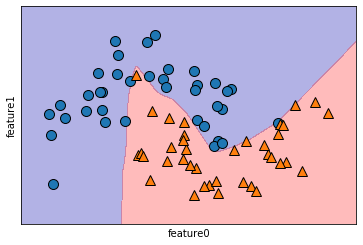

In [44]:
X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y, random_state=42)

mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.show()

#### Multi Layer Perceptron
AND

In [45]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,0,0,1])
mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X,Y)

y_pred=mlp.predict([[0,0],[0,1],[1,0],[1,1]])
y_pred

array([0, 0, 0, 1])

XOR

In [46]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,0])
mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X,Y)

y_pred=mlp.predict([[0,0],[0,1],[1,0],[1,1]])
y_pred

array([0, 1, 1, 0])

사이킷런 패키지의 perceptron과 MLP를 비교해서 XOR 게이트가 single layer perceptron은 학습이 되지 않고, Multi layer perceptron은 학습이 됨을 확인 할 수 있었다.